**Knowledge discovery in databases - Infant Mortality Rate India - Data Collection**

**Understanding the domain and data selection**

The below block of code loads the provided dataset, inspect its structure, and understand its content.

In [4]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
import pandas as pd
data = pd.read_csv('Infant_Mortality_Rate_1.csv')

Saving Infant_Mortality_Rate_1.csv to Infant_Mortality_Rate_1.csv


In [5]:
# Display the first few rows of the dataset
data.head()

,Sl.No.,States/Union Territories,1971,1972,1973,1974,1975,1976,1977,1978,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,1,Andhra Pradesh,106.0,116.0,105.0,111,123,122,125,117,...,62.0,59.0,59,57,56,54,52,49,46,43
1,2,Assam,139.0,136.0,136.0,136,144,124,115,118,...,70.0,67.0,66,68,67,66,64,61,58,55
2,3,Bihar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,60.0,61,61,60,58,56,52,48,44
3,4,Chhatisgarh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,70.0,60,63,61,59,57,54,51,48
4,5,Gujarat,144.0,128.0,161.0,106,154,146,138,122,...,60.0,57.0,53,54,53,52,50,48,44,41


**Data Preprocessing**

The below block of code prepares the data by handling missing values, filtering for the relevant years, and ensuring data consistency.

In [6]:
# Handle missing values: Iteratively apply forward-fill and then backward-fill for each row
for index, row in data.iterrows():
    data.loc[index] = row.fillna(method='ffill').fillna(method='bfill')

# Filter the dataset for the years 2002-2011
years_of_interest = [' States/Union Territories'] + [str(year) for year in range(2002, 2012)]
filtered_data = data[years_of_interest]

# Exclude rows with "National Average" if present
filtered_data = filtered_data[filtered_data[' States/Union Territories'] != 'National Average']

# Display the cleaned and filtered data
filtered_data.head()


,States/Union Territories,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Andhra Pradesh,62.0,59.0,59,57,56,54,52,49,46,43
1,Assam,70.0,67.0,66,68,67,66,64,61,58,55
2,Bihar,61.0,60.0,61,61,60,58,56,52,48,44
3,Chhatisgarh,73.0,70.0,60,63,61,59,57,54,51,48
4,Gujarat,60.0,57.0,53,54,53,52,50,48,44,41


**Data Transformation**

The below block of code melts the dataset so that each row represents a state, a year, and the corresponding infant mortality rate for that year.

In [7]:
# Melt the dataset to transform it from wide format to long format
melted_data = pd.melt(filtered_data, id_vars=[' States/Union Territories'],
                      var_name='Year', value_name='Infant Mortality Rate')

# Rename the "States/Union Territories" column for easier reference
melted_data.rename(columns={' States/Union Territories': 'State'}, inplace=True)

# Display the transformed data
melted_data.head()

,State,Year,Infant Mortality Rate
0,Andhra Pradesh,2002,62.0
1,Assam,2002,70.0
2,Bihar,2002,61.0
3,Chhatisgarh,2002,73.0
4,Gujarat,2002,60.0


**Visual Exploratory Data Analysis (EDA)**

The below block of code creates a line plot where each line represents a state. The x-axis will denote the years, and the y-axis will represent the infant mortality rates.

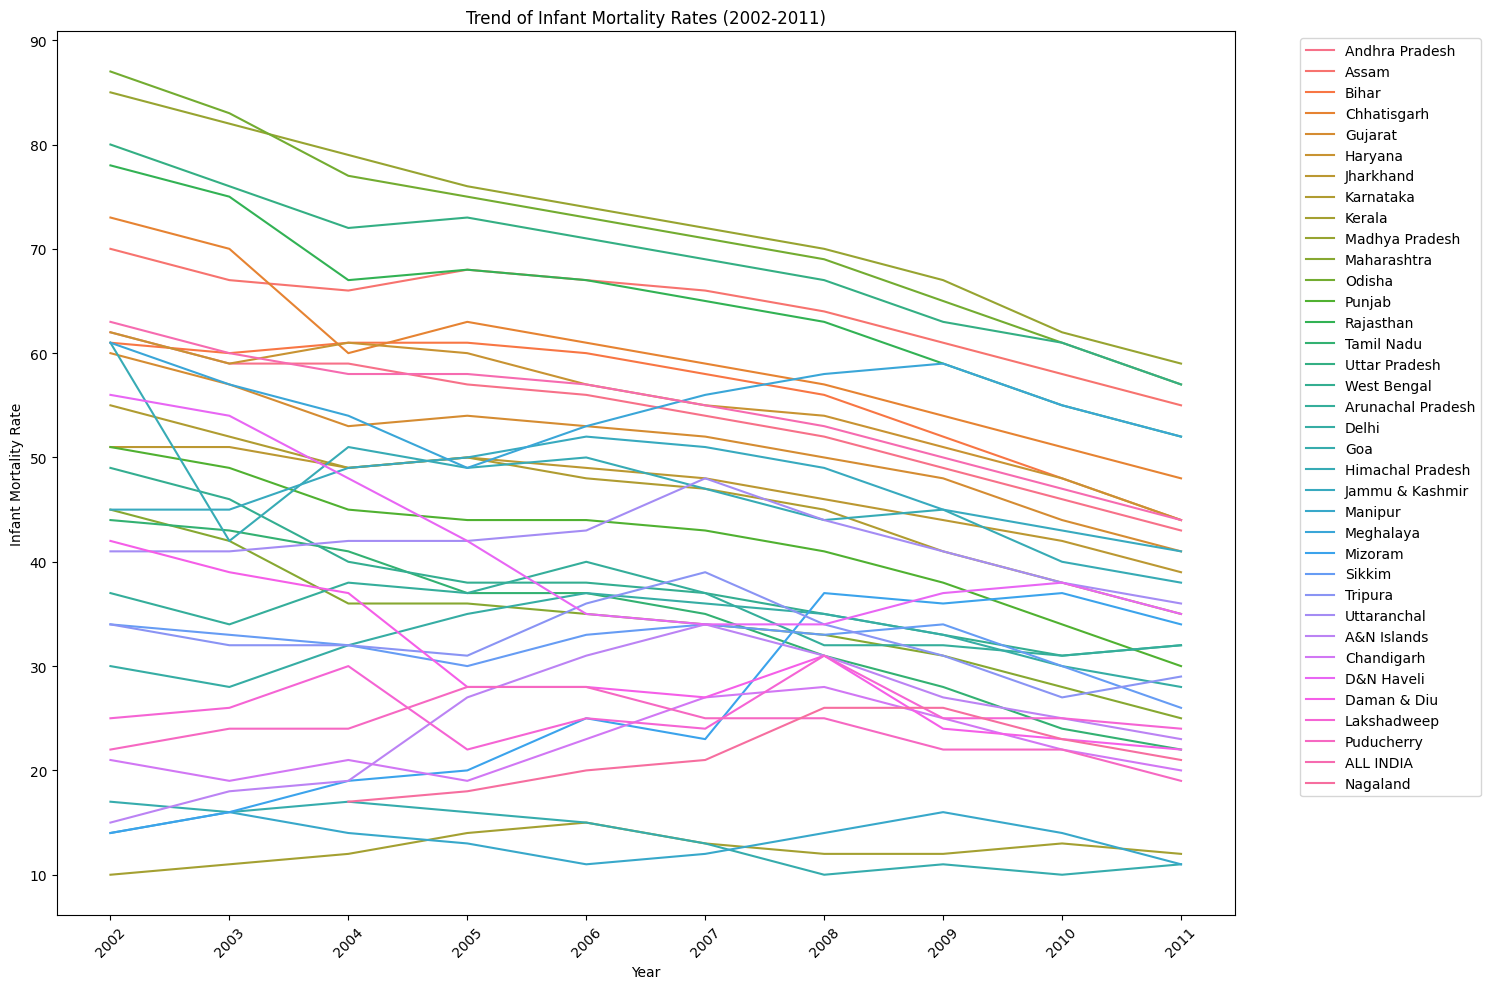

In [9]:
# Handle the DataFrame modification correctly and ensure necessary imports
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the "Infant Mortality Rate" column to numeric type without directly modifying a slice
cleaned_data = cleaned_data.copy()
cleaned_data['Infant Mortality Rate'] = pd.to_numeric(cleaned_data['Infant Mortality Rate'])

# Visualize the trends of infant mortality rates for the states over the years 2002-2011
plt.figure(figsize=(15,10))
sns.lineplot(data=cleaned_data, x='Year', y='Infant Mortality Rate', hue='State')
plt.title('Trend of Infant Mortality Rates (2002-2011)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Data Mining**

The below block of code will identify the top 10 states based on their average infant mortality rates from 2002 to 2011.

In [10]:
# Calculate the average infant mortality rate for each state over 2002-2011
average_rates = cleaned_data.groupby('State')['Infant Mortality Rate'].mean()

# Sort the states by their average rates in ascending order and select the top 10
top_10_states = average_rates.sort_values().head(10)

top_10_states

State
Kerala         12.4
Manipur        13.5
Goa            13.6
Nagaland       21.5
Chandigarh     22.5
Puducherry     23.9
A&N Islands    25.0
Lakshadweep    25.7
Mizoram        26.1
Daman & Diu    30.1
Name: Infant Mortality Rate, dtype: float64

**Pattern Evaluation and Knowledge Representation**

The below block of does the following:
Discuss the results and their significance.
Visualize the average infant mortality rates of the top 10 states/union territories. The bar plot provides a visual representation of the top 10 states/union territories with the lowest average infant mortality rates from 2002 to 2011.

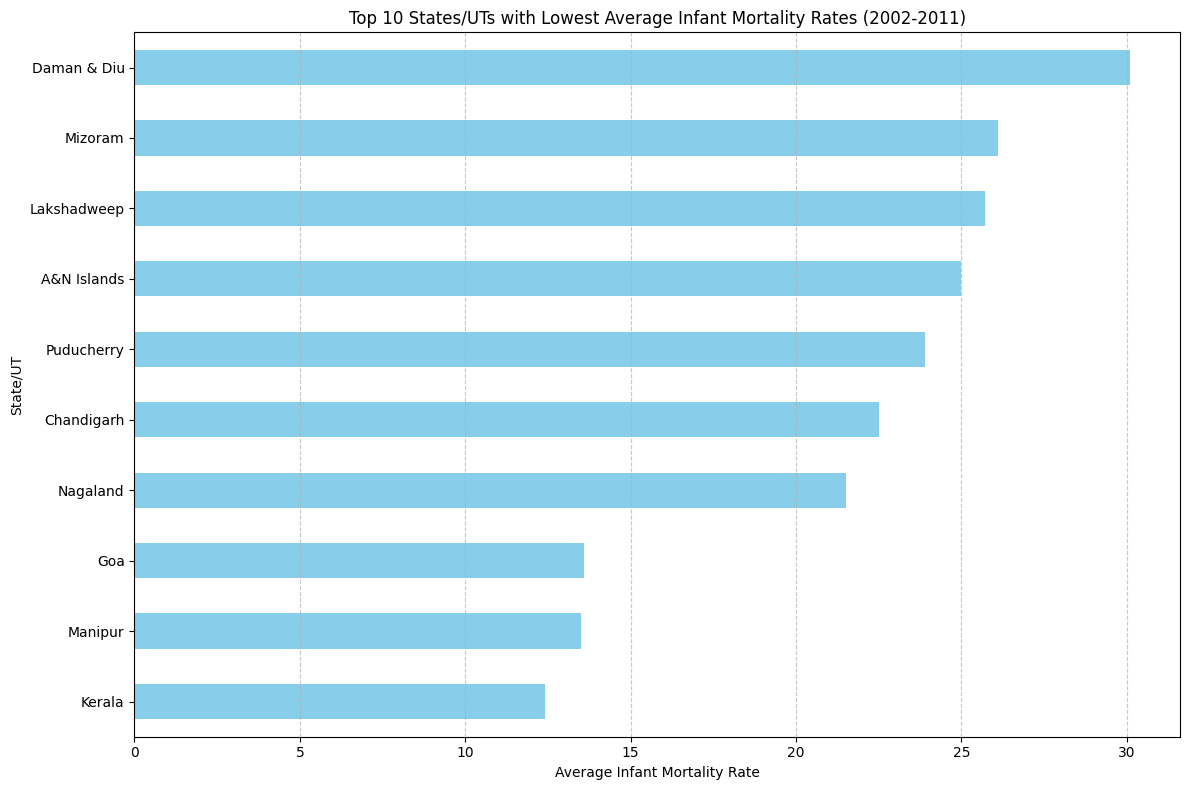

In [11]:
# Plot the average infant mortality rates of the top 10 states/union territories
plt.figure(figsize=(12, 8))
top_10_states.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 States/UTs with Lowest Average Infant Mortality Rates (2002-2011)')
plt.xlabel('Average Infant Mortality Rate')
plt.ylabel('State/UT')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Knowledge Deployment**

The below block of code is going to the following:
Storing the key findings and recommendations in a structured format.
Saving this structured knowledge to a file so that it can be shared or deployed elsewhere.

In [18]:
import json

# Structured knowledge
knowledge_deployment = {
    "Key Findings": {
        "Top 3 States with Lowest IMR": ["Kerala", "Manipur", "Goa"],
        "Union Territories Performance": "Several union territories like Chandigarh, Puducherry, and A&N Islands have low IMR.",
        "Geographical Diversity": "States from diverse regions, North-East and South, are in the top 10, indicating widespread positive health outcomes."
    },
    "Recommendations": {
        "Benchmarking": "Emulate healthcare strategies from states with low IMR.",
        "Investment": "Strengthen healthcare infrastructure, especially in underserved areas.",
        "Awareness": "Promote health awareness campaigns focusing on maternal and child health.",
        "Collaboration": "Collaborate with union territories and high-performing states for knowledge exchange.",
        "Monitoring": "Adopt a data-driven approach for real-time policy adjustments.",
        "Further Research": "Investigate deeper into factors like literacy rates, economic conditions, and sanitation."
    }
}

# Save to a JSON file
file_path = "knowledge_deployment.json"
with open(file_path, 'w') as file:
    json.dump(knowledge_deployment, file, indent=4)

file_path


'knowledge_deployment.json'